In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP, RandomizedMLP
from src.GridSearch import GridSearch
from sklearn.model_selection import train_test_split

In [3]:
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.2, random_state = 42)

Early stopped training on epoch 50
382600.87273553835


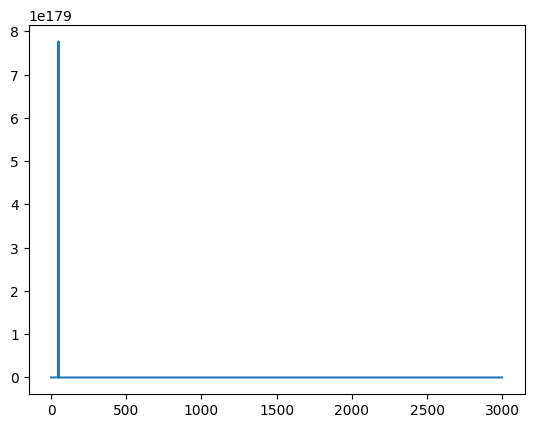

In [5]:
rmlp = RandomizedMLP([100, 100], 9, 2,task = "regression", activation_function = "relu")

rmlp.fit(X_train, y_train,batch_size = len(X_train), n_epochs = 3000, early_stopping = True, step= 0.1, weights_scale = 0.5, weights_mean = 0,
         momentum=0.5, regularization='no', tolerance = 0.0000001, patience = 50)

plt.plot(rmlp.learning_curve)

print(rmlp.evaluate_model(X_test, y_test))

In [8]:
elle2 = [1/(2**j*2) for j in range(5, 9)]
elle2.append(0)
elle2

[0.015625, 0.0078125, 0.00390625, 0.001953125, 0]

In [9]:
rmlp = RandomizedMLP([100, 100], 9, 2,task = "regression", activation_function = "relu")

params_grid = {
    "step": [0.1, 0.05, 0.01],
    "momentum": [ 0, 0.5],
    "batch_size": [len(X_train)],
    'alpha_l2' : elle2,
    'alpha_l1' : elle2,
    'Nesterov' : [False],
    'backprop_variant' : ['no'],
    'weights_scale' : [0.2, 0.1, 0.05],
                          
    'weights_initialization' : ['scaled'],      
    'regularization' : ['elastic'],
    'n_epochs' : [3000],
    'tolerance' : [0.000001],
    'patience': [50]
                  
}

grid_rand = GridSearch(rmlp)
grid_rand.fit(X_train, y_train, params_grid, n_folds = 5, parallel = True)

print(grid_rand.best_model.evaluate_model(X_test, y_test))

Grid search of combinations: 450
Parallelisation activated


In [ ]:
#play windows notification sound
import winsound
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)
